In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, LinearConstraint
from IPython.core.interactiveshell import InteractiveShell
import datetime as dt
from common.calculate_volatility import calculate_variance

InteractiveShell.ast_node_interactivity = "all"

In [67]:
split_date= dt.datetime(2011,12,5)
data = pd.read_csv('./data/GSPC.csv')
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2013-11-22,1797.209961,1804.839966,1794.699951,1804.760010,1804.760010,3055140000
2013-11-25,1806.329956,1808.099976,1800.579956,1802.479980,1802.479980,2998540000
2013-11-26,1802.869995,1808.420044,1800.770020,1802.750000,1802.750000,3427120000


In [68]:
test_data = data[data.index>=split_date]

In [69]:
test_data['log_price_return'] = np.log(test_data['Adj Close']).diff(1)
returns = test_data['log_price_return'].dropna()

test_data_set = pd.DataFrame()

tmp = calculate_variance(returns)
af = test_data['log_price_return']

test_data_set['rv'] = np.sqrt(tmp)
test_data_set['log_return'] = af

/var/folders/ws/lngrb3y14bx9ckr9196sk6qm0000gn/T/ipykernel_46249/2457074447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['log_price_return'] = np.log(test_data['Adj Close']).diff(1)


<Figure size 1500x1000 with 0 Axes>

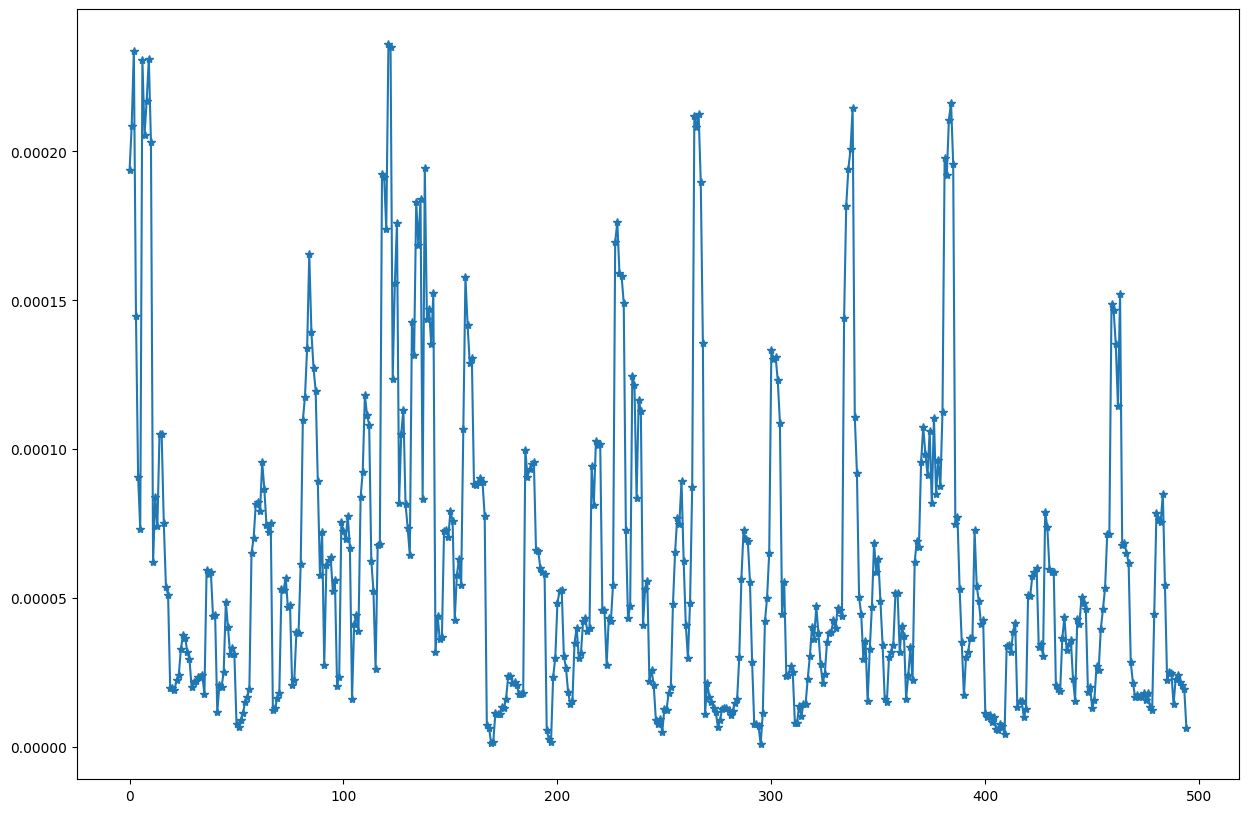

In [70]:
plt.figure(figsize=(15,10))
plt.plot(test_data_set['rv'].values**2,marker='*')

In [71]:
test_data_set

,rv,log_return
Date,,
2011-12-12,0.013914,-0.015026
2011-12-13,0.014442,-0.008724
2011-12-14,0.015291,-0.011413
2011-12-15,0.012025,0.003238
2011-12-16,0.009518,0.003211
...,...,...
2013-11-22,0.004924,0.004949
2013-11-25,0.004671,-0.001264
2013-11-26,0.004581,0.000150
